# Classification

In [4]:

# %load ../standard_import.txt
import pandas as pd
import numpy as np

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# This dataset comes from the ISLR R package, pull from the install script
default_data = pd.read_csv('Data/Default.csv')

# Grab the label array using factorize 
default_data['default2'] = default_data.default.factorize()[0]
default_data['student2'] = default_data.student.factorize()[0]
default_data.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


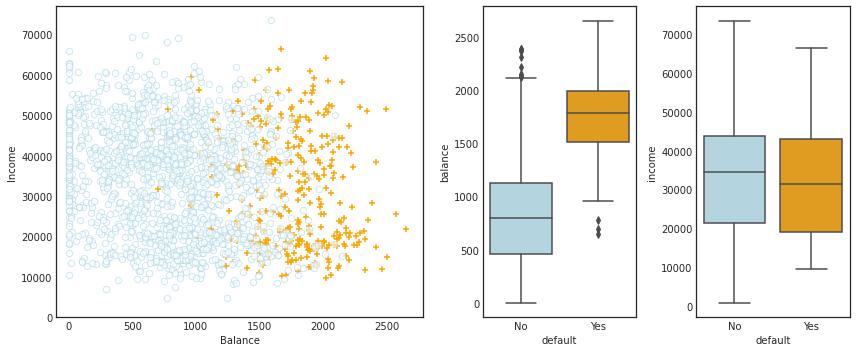

In [10]:
# set up the layout/size of the plots
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Sample a subset of the no values
default_data_no = default_data[
    default_data.default2 == 0
    ].sample(frac=0.15)
# Grab all the yes's
default_data_yes = default_data[
    default_data.default2 == 1]
default_data_ = default_data_no.append(default_data_yes)

# plot a scatter plot in the first figure
ax1.scatter(default_data_[
    default_data_.default == 'Yes'
    ].balance, default_data_[
        default_data_.default == 'Yes'
        ].income,
    s=40,
    c='orange',
    marker='+',
    linewidths=1
    )
ax1.scatter(
    default_data_[
    default_data_.default == 'No'
    ].balance, default_data_[
        default_data_.default == 'No'
        ].income,
    s=40,
    marker='o',
    linewidths='1',
    edgecolors='lightblue',
    facecolors='white',
    alpha=.6
    )

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

# Second fig boxplot using balance
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(
    'default',
    'balance',
    data=default_data, 
    orient='v',
    ax=ax2,
    palette=c_palette
    )
# Third figure using income
sns.boxplot(
    'default',
    'income',
    data=default_data,
    orient='v',
    ax=ax3,
    palette=c_palette
    )

gs.tight_layout(plt.gcf())

## Logistic Regression

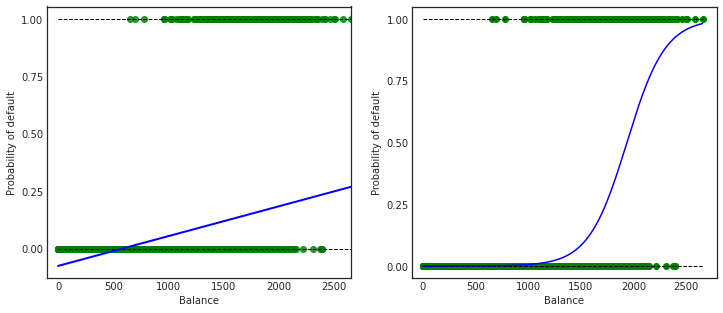

In [12]:
# Make the training data
X_train = default_data.balance.values.reshape(-1,1) 
y = default_data.default2

# Make test data
X_test = np.arange(
    default_data.balance.min(),
    default_data.balance.max()
    ).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Frist fig
sns.regplot(
    default_data.balance,
    default_data.default2,
    order=1,
    ci=None,
    scatter_kws={'color':'green'},
    line_kws={'color':'blue', 'lw':2},
    ax=ax1
    )

# Second fig
ax2.scatter(X_train, y, color='green')
ax2.plot(X_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(
        1,
        xmin=ax.xaxis.get_data_interval()[0],
        xmax=ax.xaxis.get_data_interval()[1],
        linestyles='dashed',
        lw=1
        )
    ax.hlines(
        0,
        xmin=ax.xaxis.get_data_interval()[0],
        xmax=ax.xaxis.get_data_interval()[1],
        linestyles='dashed',
        lw=1
        )
    
    # labels and tics
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)